In [14]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
job_df = pd.read_csv('IT_Job_Roles_Skills.csv', encoding='cp1252')
resume_df = pd.read_csv('resume_data.csv')

In [9]:

print("Job dataset shape:", job_df.shape)
print("Resume dataset shape:", resume_df.shape)

Job dataset shape: (493, 4)
Resume dataset shape: (9544, 35)


In [5]:
print(job_df.columns)
print(resume_df.columns)

Index(['Job Title', 'Job Description', 'Skills', 'Certifications'], dtype='object')
Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')


In [8]:
def clean_text(text):
    """
    Clean input text by:
    - Converting to string & lowercase
    - Removing BOM and non-ASCII chars
    - Removing punctuation and special chars
    - Removing stopwords (English)
    - Lemmatizing tokens
    - Joining back into clean string
    """
    if pd.isnull(text):
        return ""
    text = str(text)
    # Remove BOM & non-ASCII characters
    text = text.encode('ascii', errors='ignore').decode()
    text = text.lower()

    # Remove punctuation (keep spaces)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]

    return ' '.join(tokens)

In [10]:
if 'job_title' in job_df.columns:
    job_df.rename(columns={'job_title':'job_title'}, inplace=True)

In [11]:
job_text_cols = ['Job Title', 'Job Description', 'Skills', 'Certifications']

In [16]:
for col in job_text_cols:
    if col in job_df.columns:
        print(f"Cleaning column: {col}")
        job_df[col] = job_df[col].apply(clean_text)

Cleaning column: Job Title
Cleaning column: Job Description
Cleaning column: Skills
Cleaning column: Certifications


<Figure size 1200x500 with 0 Axes>

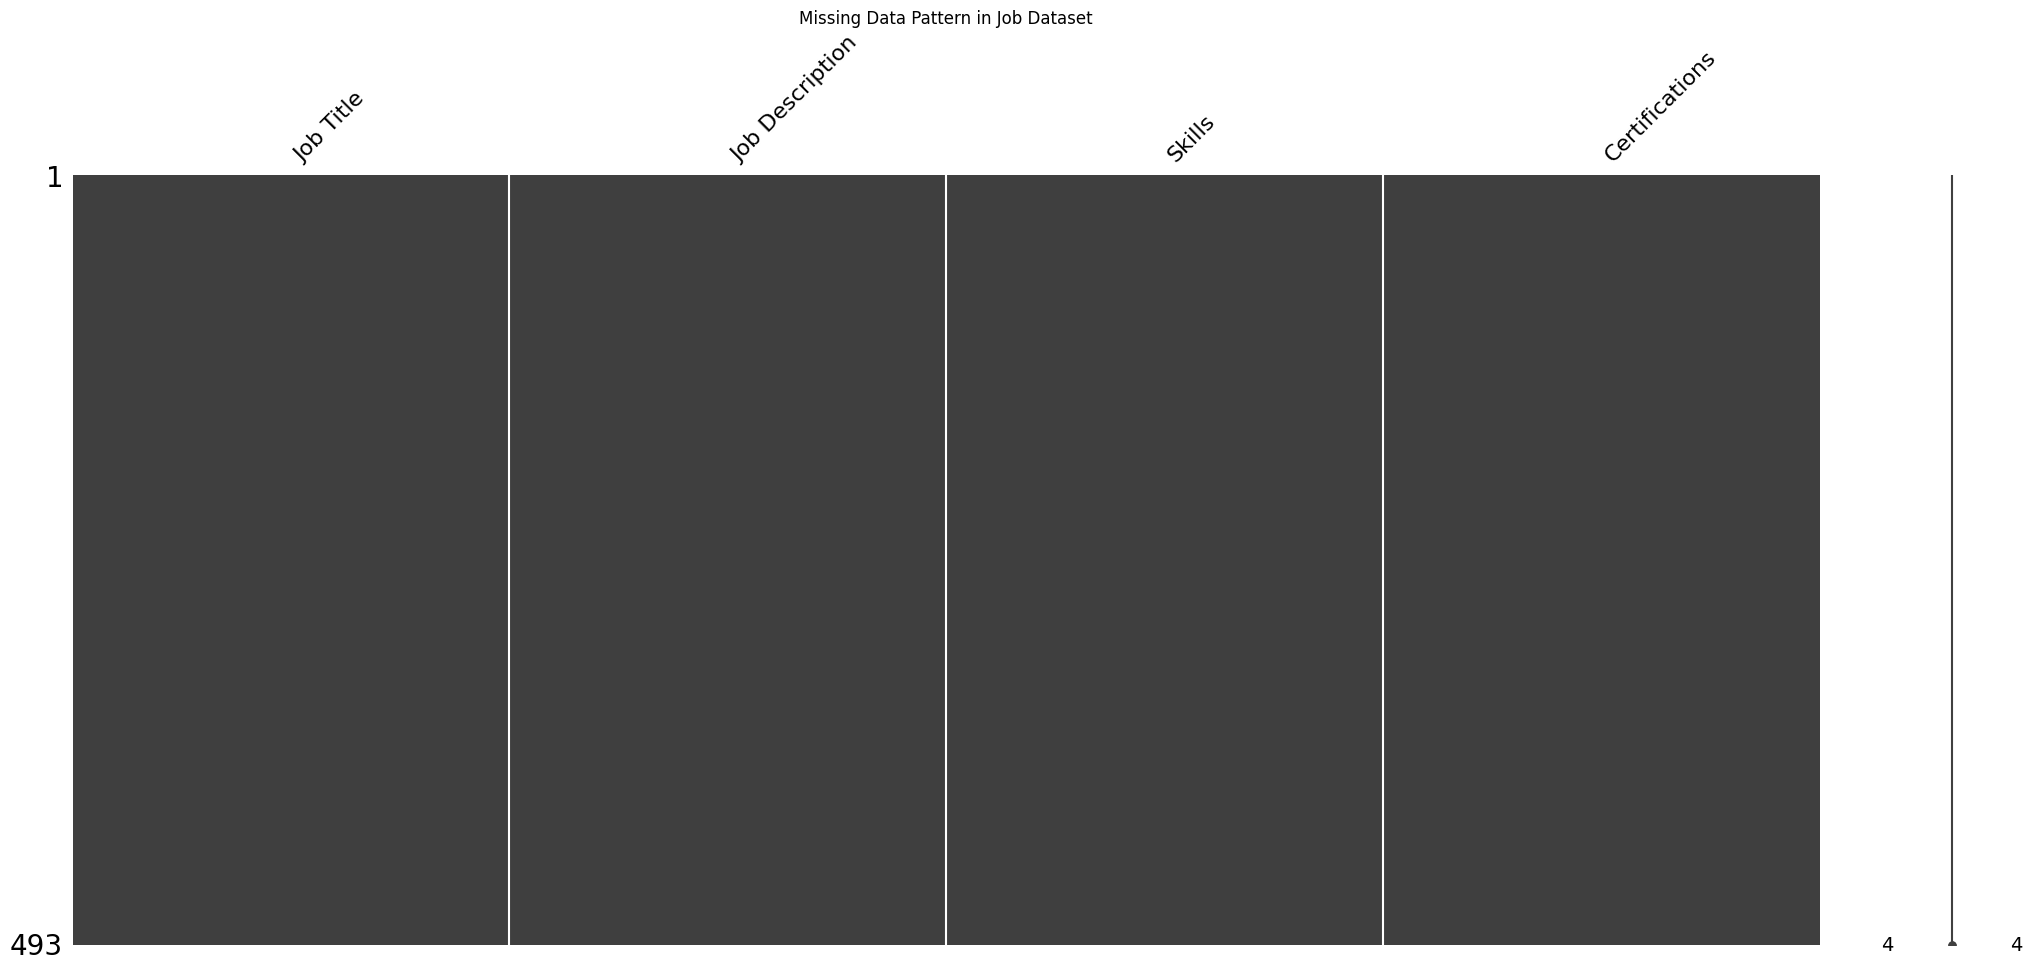

In [17]:
plt.figure(figsize=(12,5))
msno.matrix(job_df)
plt.title('Missing Data Pattern in Job Dataset')
plt.show()

In [18]:
if 'cleaned_skills' in job_df.columns:
    all_skills = job_df['cleaned_skills'].str.cat(sep=' ').split()
    skills_freq = pd.Series(all_skills).value_counts().head(50)

    plt.figure(figsize=(14,8))
    sns.barplot(x=skills_freq.values, y=skills_freq.index, palette='coolwarm')
    plt.title('Top 50 Skills Frequency in Job Dataset')
    plt.xlabel('Frequency')
    plt.ylabel('Skills')
    plt.show()

In [37]:
job_df['cleaned_jd'] = job_df['Job Description'].astype(str).str.lower().str.replace(r'[^\w\s]', ' ', regex=True).str.replace(r'\s+', ' ', regex=True)
job_df['cleaned_skills'] = job_df['Skills'].astype(str).str.lower().str.replace(r'[^\w\s]', ' ', regex=True).str.replace(r'\s+', ' ', regex=True)

In [40]:
job_df['combined_job_text'] = job_df['cleaned_jd'] + ' ' + job_df['cleaned_skills']

In [26]:
cols_to_drop = [
    'positions',
    'locations',
    'extra_curricular_activity_types',
    'extra_curricular_organization_names',
    'extra_curricular_organization_links',
    'role_positions',
    'company_urls',
    'online_links', 'address',
    'start_dates',
    'end_dates',
    'issue_dates',
    'expiry_dates',
    'languages',
    'proficiency_levels',
    'educationaL_requirements',
    'age_requirement',
]
resume_df = resume_df.drop(columns=[col for col in cols_to_drop if col in resume_df.columns])

print(f"Remaining columns:\n{resume_df.columns.tolist()}")

Remaining columns:
['career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'related_skils_in_job', 'responsibilities', 'certification_providers', 'certification_skills', '\ufeffjob_position_name', 'experience_requirement', 'skills_required', 'matched_score']


In [19]:
if 'experiencere_requirement' in resume_df.columns:
    resume_df.rename(columns={'experiencere_requirement':'experience_requirement'}, inplace=True)

In [27]:
resume_text_cols = [
    'career_objective',
    'skills',
    'educational_institution_name',
    'degree_names',
    'passing_years',
    'educational_results',
    'result_types',
    'major_field_of_studies',
    'professional_company_names',
    'responsibilities',
    'certification_providers',
    'certification_skills',
    'combined_resume',
    'cleaned_resume'
]


In [28]:
for col in resume_text_cols:
    if col in resume_df.columns:
        print(f"Cleaning column: {col}")
        resume_df[col] = resume_df[col].apply(clean_text)

Cleaning column: career_objective
Cleaning column: skills
Cleaning column: educational_institution_name
Cleaning column: degree_names
Cleaning column: passing_years
Cleaning column: educational_results
Cleaning column: result_types
Cleaning column: major_field_of_studies
Cleaning column: professional_company_names
Cleaning column: responsibilities
Cleaning column: certification_providers
Cleaning column: certification_skills


In [29]:
if 'responsibilities' in resume_df.columns and 'responsibilities.1' in resume_df.columns:
    resume_df['responsibilities'] = resume_df['responsibilities'] + ' ' + resume_df['responsibilities.1']
    resume_df.drop(columns=['responsibilities.1'], inplace=True)

<Figure size 1200x500 with 0 Axes>

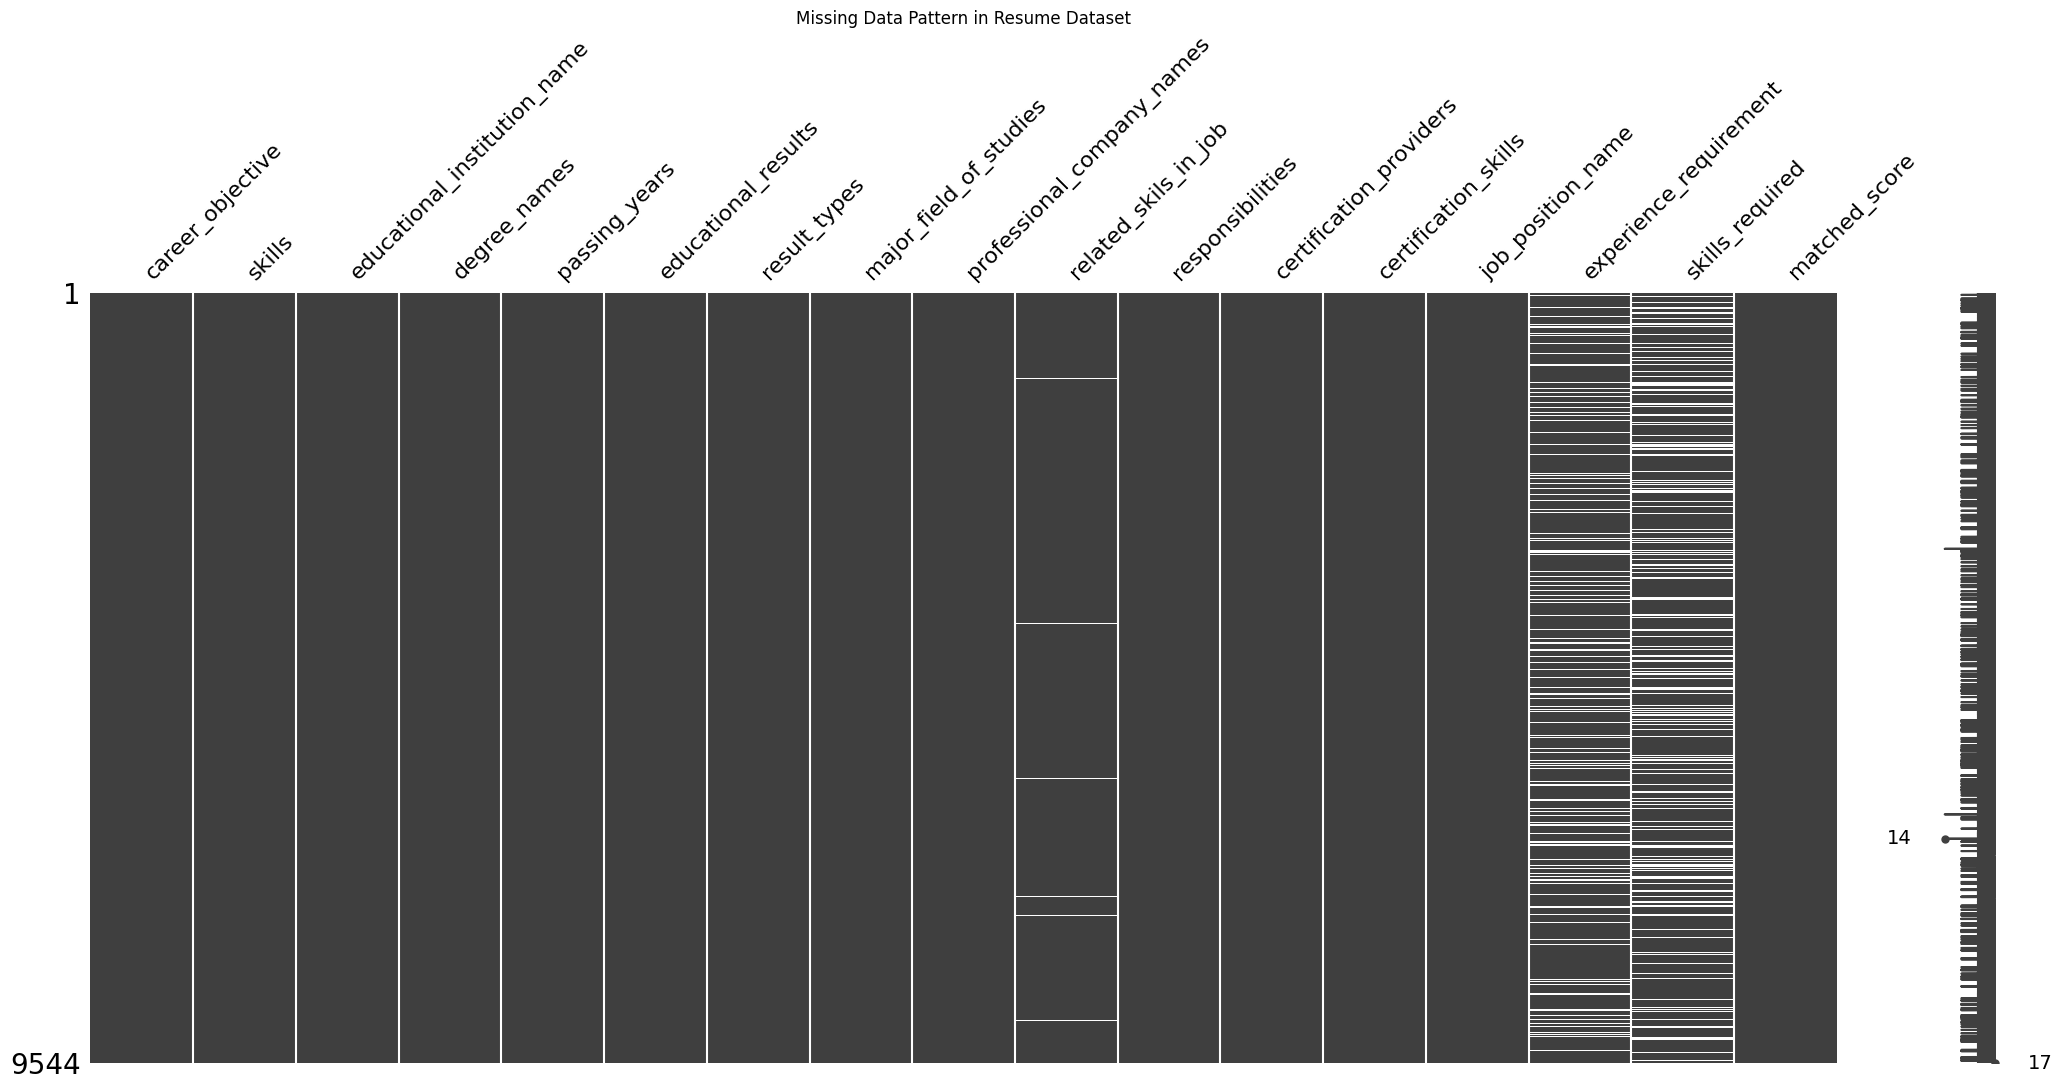

In [30]:
plt.figure(figsize=(12,5))
msno.matrix(resume_df)
plt.title('Missing Data Pattern in Resume Dataset')
plt.show()

In [31]:
missing_pct = resume_df.isnull().mean()
cols_to_drop = missing_pct[missing_pct > 0.5].index
print(f"Dropping columns with >50% missing: {list(cols_to_drop)}")
resume_df.drop(columns=cols_to_drop, inplace=True)

Dropping columns with >50% missing: []


In [32]:
skill_cols = ['skills', 'cleaned_skills', 'certification_skills']
for col in skill_cols:
    if col in resume_df.columns:
        resume_df[col] = resume_df[col].fillna('')

In [33]:
combine_cols = ['career_objective', 'skills', 'degree_names', 'professional_company_names',
                'positions', 'locations', 'responsibilities', 'certification_skills', 'combined_resume']

In [34]:
available_cols = [col for col in combine_cols if col in resume_df.columns]

resume_df['final_resume_text'] = resume_df[available_cols].fillna('').agg(' '.join, axis=1)

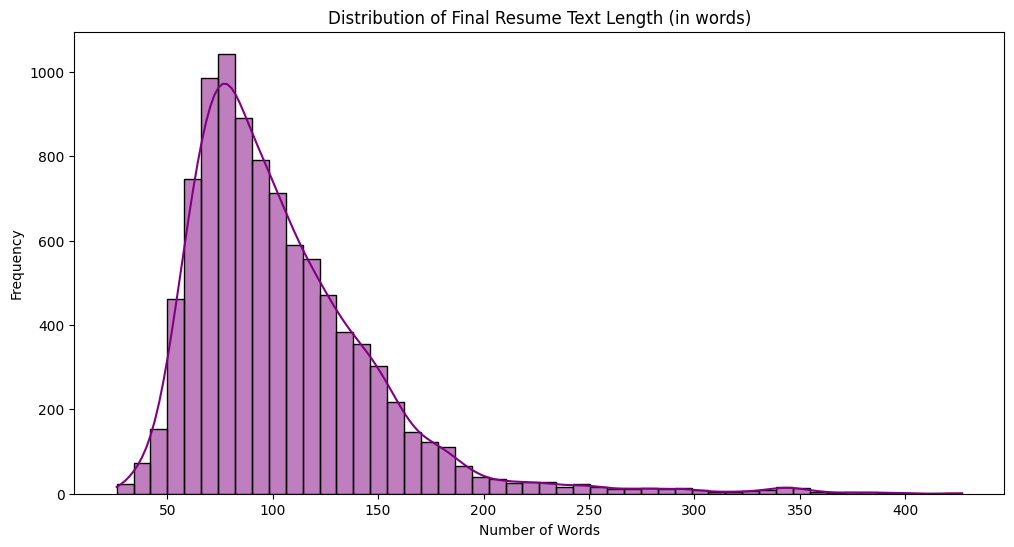

In [35]:
resume_df['text_length'] = resume_df['final_resume_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,6))
sns.histplot(resume_df['text_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Final Resume Text Length (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [36]:
job_df.to_csv('job_data_cleaned.csv', index=False)
resume_df.to_csv('resume_data_cleaned.csv', index=False)

print("Cleaned datasets saved as 'job_data_cleaned.csv' and 'resume_data_cleaned.csv'")

Cleaned datasets saved as 'job_data_cleaned.csv' and 'resume_data_cleaned.csv'
